In [ ]:
# Hyperparameters
num_estimators = 100

In [ ]:
# Cisco Dacanay
# Zach Greenhill

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import torchvision.models as models
import kagglehub
import os
import pandas as pd
import numpy as np
from datetime import timedelta
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
import joblib

In [ ]:
# Function to seperate
def separate_dataset(dataset):
    # Initialize lists to hold data and labels
    data_list = []
    label_list = []

    # Iterate through each tuple in the dataset
    for data_tensor, label_tensor in dataset:
        # Convert tensors to NumPy arrays and append to the respective lists
        data_list.append(data_tensor.cpu().numpy())  # Move to CPU if needed
        label_list.append(label_tensor.cpu().numpy())

    # Convert lists to NumPy arrays
    data_array = np.array(data_list)
    label_array = np.array(label_list)

    return data_array, label_array

In [ ]:
train_set = torch.load("./Datasets/train_set.pt")
val_set = torch.load("./Datasets/val_set.pt")
test_set = torch.load("./Datasets/test_set.pt")
column_names = np.load("./Datasets/column_names.npy")

<ipython-input-19-ddca683f3a60>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_set = torch.load("./Datasets/train_set.pt")
<ipython-input-19-ddca683f3a60>:2: FutureW

In [ ]:
# Extract data
train_features, train_labels = separate_dataset(train_set)
val_features, val_labels = separate_dataset(val_set)
test_features, test_labels = separate_dataset(test_set)

In [ ]:
randforest = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
randforest.fit(train_features, train_labels)

train_predictions = randforest.predict(train_features)
val_predictions = randforest.predict(val_features)

In [ ]:
# Calculate test metrics (no plot since there is no batch training)
train_mse = mean_squared_error(train_labels, train_predictions)
train_rmse = root_mean_squared_error(train_labels, train_predictions)
train_mae = mean_absolute_error(train_labels, train_predictions)
train_r2 = r2_score(train_labels, train_predictions)

val_mse = mean_squared_error(val_labels, val_predictions)
val_rmse = root_mean_squared_error(val_labels, val_predictions)
val_mae = mean_absolute_error(val_labels, val_predictions)
val_r2 = r2_score(val_labels, val_predictions)

print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Training Root MSE: {train_rmse:.4f}")
print(f"Training Mean Absolute Error: {train_mae:.4f}")
print(f"Training R2 Score: {train_r2:.4f}")
print("------------------------------")
print(f"Validation Mean Squared Error: {val_mse:.4f}")
print(f"Validation Root MSE: {val_rmse:.4f}")
print(f"Validation Mean Absolute Error: {val_mae:.4f}")
print(f"Validation R2 Score: {val_r2:.4f}")



Training Mean Squared Error: 38.8009
Training Root MSE: 6.2290
Training Mean Absolute Error: 1.7738
Training R2 Score: 0.9955
------------------------------
Validation Mean Squared Error: 662.7706
Validation Root MSE: 25.7443
Validation Mean Absolute Error: 5.5834
Validation R2 Score: 0.9201


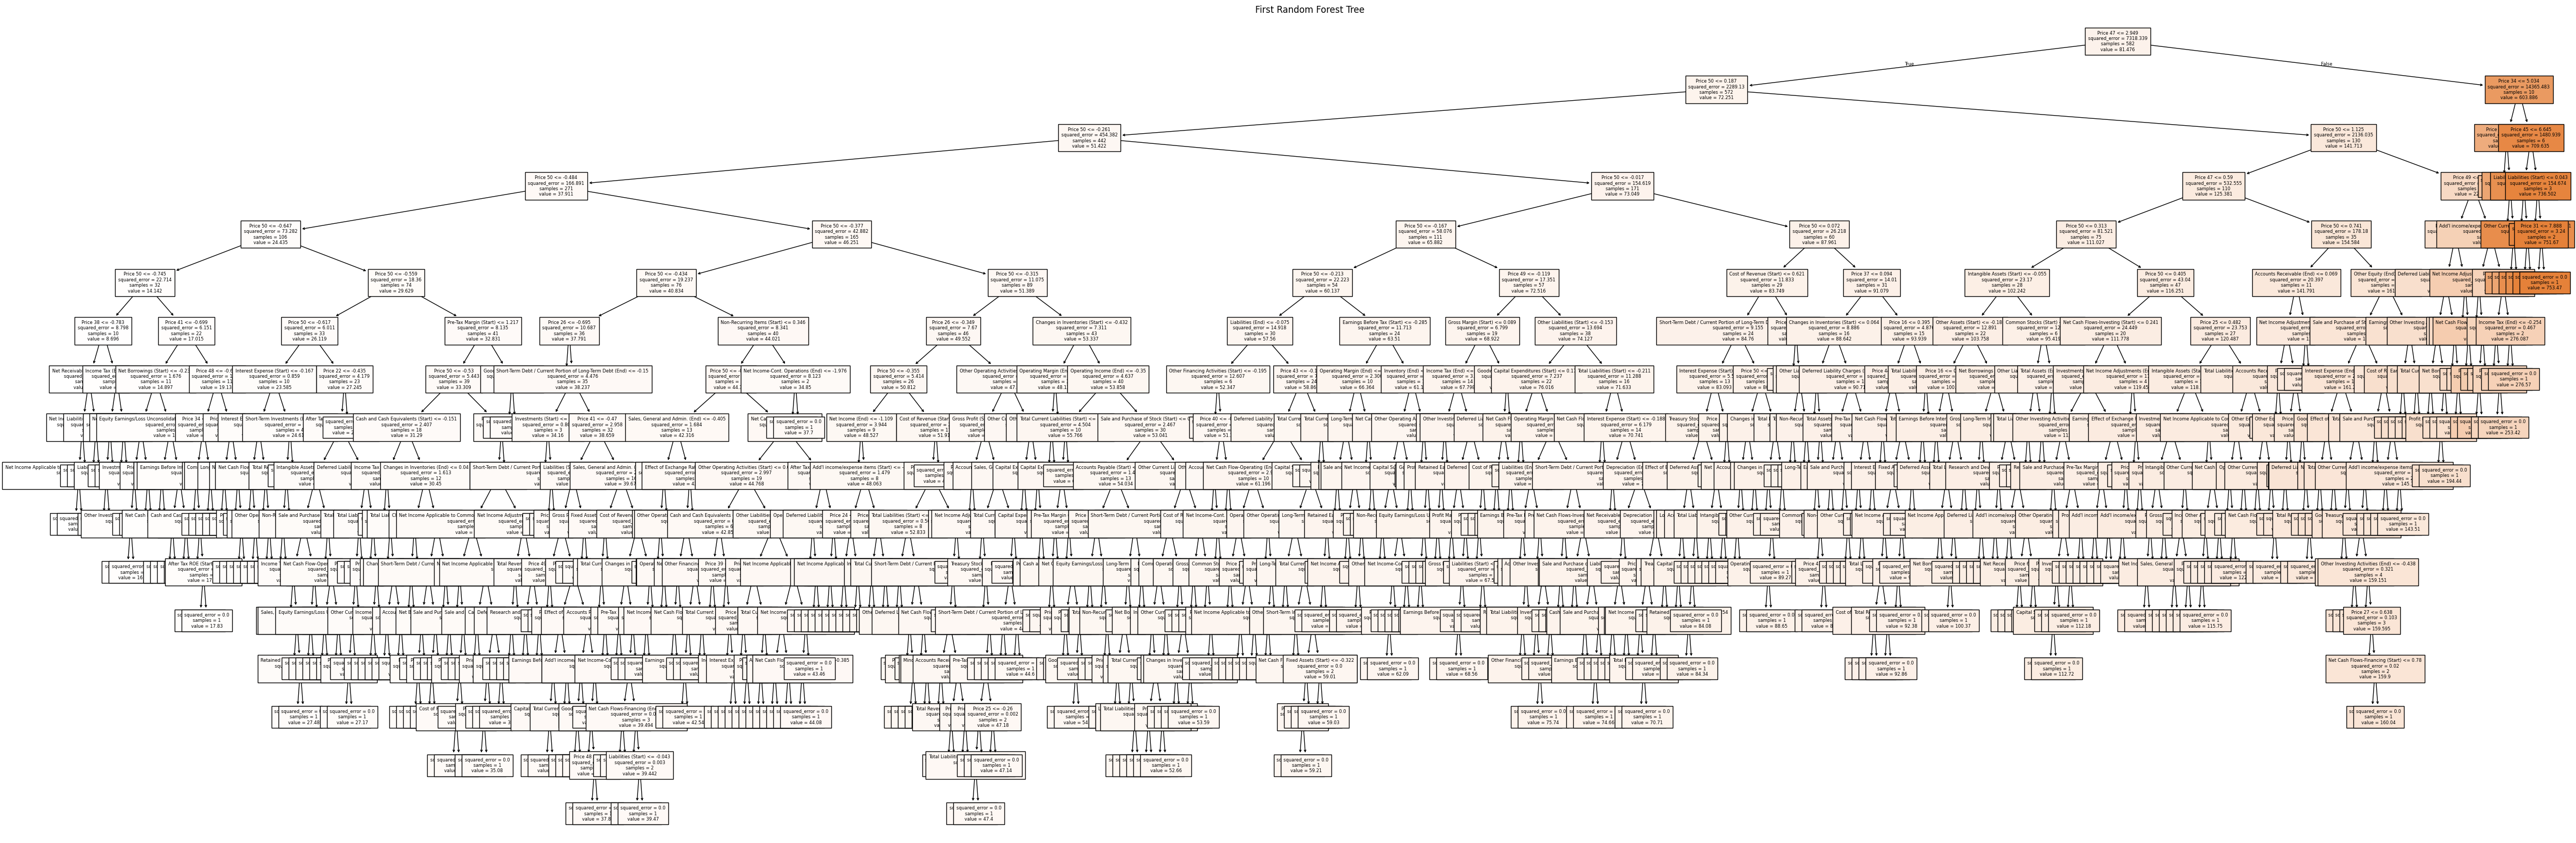

In [ ]:
# Plot one of the decision trees
feature_names = column_names[:-1]

plt.figure(figsize=(60, 20))
tree.plot_tree(randforest.estimators_[0], fontsize=6, feature_names = feature_names, filled = True)

plt.title("First Random Forest Tree")
plt.show()

In [ ]:
# Save the model
joblib.dump(randforest, "./Models/random_forest.joblib")

['./Models/random_forest.joblib']